In [1]:
import pandas as pd
import numpy as np
import names
import matplotlib.pyplot as plt

from churn_simulator_class import Customer, Simulation

#### 1) Define all global variables and load the data

In [2]:
# create a list that contains all the possible states
STATES = ['Apple', 'Banana', 'Coffee', 'Doughnut', 'churned']

# create a list of all possible initial states
INIT_STATES = ['Apple', 'Banana', 'Coffee', 'Doughnut']

# create a dictionary for the translation between state and vectorized state
D = {'Apple': 0, 'Banana': 1, 'Coffee': 2, 'Doughnut': 3, 'churned': 4}

# chose the number of periods for the simmulation
N = 30

# chose the number of simulations to run (initial nr. of customers)
M = 100

# New customers per period
NC = int(M * 0.7)

# create a dataframe for the output
#output = pd.DataFrame()

# load and initialize the transition matrix
CUST = pd.read_csv('./data/customer_matrix.csv', index_col=0)
TRANS = pd.read_csv('./data/transition_probabilities.csv', index_col=0)

# Add the probabilites from the state 'churned'
churn_row = pd.DataFrame([[0, 0, 0, 0, 1]], columns=TRANS.columns)
TRANS = TRANS.append(churn_row)
TRANS = TRANS.rename({0: 'churned'}, axis='index')

# Create a dictionary mapping good and price
PRICES = dict(CUST[['flavor', 'price']].values.tolist())

#### 2) Instantiate the simulation, create customers and the simulation

In [15]:
test = Simulation(N, M, NC, PRICES, INIT_STATES, STATES, TRANS, D)

In [16]:
test

This simulation of a companie's customer purchase history runs for 30 periods.
                
Initialy the customer has 100 customers.
                
70 customers are added to the market in each period.
                
The prices for the goods are {'Coffee': 1390.0, 'Banana': 750.0, 'Apple': 580.0, 'Doughnut': 590.0}.
                
Lets run the simulation!!!

In [18]:
test.create_customers()

In [19]:
test.customers[:5]

[Carol Hobdy, Rachel Reynolds, Edgar Yates, Nancy Perry, Kimberly Daly]

In [20]:
test.history

""


#### 3) Run the simulation and inspect the outcome visualy

In [27]:
test.run_simulation()

The simulation has ended successfully!


In [29]:
test.create_history()

In [30]:
test.history.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
customer_id,,,,,,,,,,,,,,,,,,,,,
0,Banana,Banana,churned,churned,churned,churned,churned,churned,churned,churned,...,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned
1,Doughnut,churned,churned,churned,churned,churned,churned,churned,churned,churned,...,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned
2,Doughnut,Banana,churned,churned,churned,churned,churned,churned,churned,churned,...,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned
3,Banana,churned,churned,churned,churned,churned,churned,churned,churned,churned,...,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned
4,Apple,Coffee,churned,churned,churned,churned,churned,churned,churned,churned,...,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned


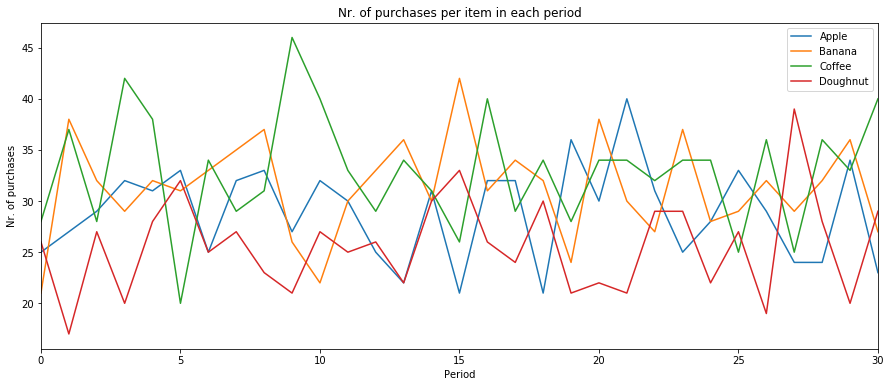

In [28]:
%matplotlib inline
test.plot_purchase_history()